# TEHREEM ZUBAIR
# SYEDA KISAA FATIMA
# INLP ASSIGNMENT - 3


---



This file contains the following parts (Sections)

Training
1.   Data preprocessing helping functions
2.   Loading Training Dataset for **Naive Bayes** and **Binary Naive bayes with Stopwords** and **Binary Naive bayes without Stopwords**
3.   **Naive Bayes Classifier**
4.   **Binary Naive Bayes Classifier with stopwords**
5.   **Binary Naive Bayes Classifier without stopwords**

Testing
1. Loading Test Dataset for **Naive Bayes**, **Binary Naive bayes with Stopwords** and **Binary Naive bayes without Stopwords**
2. Testing the working of Models
3. **Classification Report**
4. **Results**





In [ ]:
import glob
import math
import re
import spacy
from collections import Counter
from sklearn.metrics import classification_report
unlp = spacy.blank('ur')

## Data preprocessing helping functions

In [ ]:
def removePunctuation(word):
        word = word.text
        word = word.replace('\\r\\/','')
        word = word.replace(',','')
        word = word.replace('?','')
        word = word.replace('\n','')
        word = word.replace('\\n','')
        word = word.replace('٪','')
        word = word.replace('،','')
        word = word.replace('؟','')
        word = word.replace('!','')
        word = word.replace('ء','')
        word = word.replace('“','')
        word = word.replace('\\n\\/','')
        word = word.replace('۔','')
        word = word.replace('.','')
        word = word.replace(':','')
        word = word.replace('(','')
        word = word.replace(')','')
        word = word.replace('‘','')
        word = word.replace('’','')
        word = word.replace(' ','')
        word = word.replace('\ufeff','')
        return word

In [ ]:
def remove_duplicate_words(string):
        x = string.split()
        x = sorted(set(x), key = x.index)
        return ' '.join(x)

In [ ]:
#convertion of text into words
def words(text):
  return re.findall(r'\w+', text)

## Loading Training Dataset for **Naive Bayes** and **Binary Naive bayes with Stopwords**



**1.   Fake news**



In [ ]:
FakeNews_list = []

for filename in sorted(glob.glob("/content/sample_data/FAKE/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()
      sentence = unlp(i)
      news =  ''
      for word in sentence:

        #remove punctuation
        word = removePunctuation(word)
        news += word + ' '

      FakeNews_list.append(news)
    f.close()


In [ ]:
FakeNews_list

[' سٹٹگارٹ  اُردو پوائنٹ اخبارتازہ ترین 03 دسمبر2018  جرمنی کی موٹر ساز کمپنی ڈیملر نے آئندہ سال سے چین میں امرکین ٹیرف کی وجہ سے الیکٹرک کاریں بند کرنے کا اعلان کیا ہے ڈیملر کے چین کے حوالے سے شعبے کے سربراہ ہوبرٹس ٹروسکا نے بتایا کہ کمپنی آئندہ سال 2019 کے آخر تک چین میں الیکٹرک کاروں کی پیداوار بند کر دے گی جن میں مرسڈیز بینز ای کیو سی ماڈل بھی شامل ہے انکا مزید کہنا تھا کہ چین میں امرکین ٹیرف کی وجہ سے الیکٹرک کاریں جیسا کہ مرسڈیز بینز مے بیچ ماڈل کی طلب میں کمی آرہی ہے اس لیے یہ فیصلہ کیا گیا ہے  ',
 ' کراچی  آن لائن  حکومت نے عوام کو باہرکریڈٹ یا ڈیبٹ کارڈ استعمال کرنے پر ٹیکس معاف کر دیا اگر آپ سعودیہ عرب عمرہ یا حج کے سلسلے میں جارہے ہیں یا کسی کام کے سلسلے میں کسی اور ملک جا رہے ہیں تو اپکو ساتھ کرنسی لے جانے کی کوئی ضرورت نہیں ہے کیونکہ بینک ڈیبٹ یا کریڈٹ کارڈ کے استعمال پر آپکو ٹیکس ادا نہیں کرنا ہو گا ایف بی آر کے مطابق بیرون ممالک کارڈ استعمال کرنے کی صورت میں کوئی فیصد ٹیکس نہیں عائد کیا جائے گا تاکہ عام عوام کو فائدہ اور سہلولیات فراہم کیجا سکیں  ',
 ' بیجنگ چینی حکو


**2.   Real news**



In [ ]:
RealNews_list = []

for filename in sorted(glob.glob("/content/sample_data/REAL/*")):
    with open(filename, 'r') as f:
      i = f.read()
      sentence = unlp(i)
      news =  ''
      for word in sentence:

        #remove punctuation
        word = removePunctuation(word)
        news += word + ' '

      RealNews_list.append(news)
    f.close()


In [ ]:
RealNews_list

['چین کے صدر شی جن پنگ نے منگل کے روز چین کی منڈی کو آزاد بنانے کے عمل کے چالیس سال مکمل ہونے کے موقعے پر خطاب کرتے ہوئے اصلاحات پر عمل درآمد کے عزم کا اظہار کیا  تاہم انہوں نے ان خصوصی اقدامات کا ذکر نہیں کیا جن کا شدت سے انتظار کیا جا رہا تھا   صدر شی نے اپنی طویل تقریر میں سرکاری معیشت کی حمایت کے ساتھ ساتھ نجی شعبےکی نمو پر بھی بات کی  انہوں نے کہا کہ چین اپنی منڈیوں کو مزید آزاد کرنے کی کوششوں کو وسعت دینے کا عمل جاری رکھے گا  اور بنیادی اصلاحات کے نفاذ کو یقینی بنائے گا   بیجنگ میں قائم گریٹ ہال آف دی پیپل میں خطاب کرتے ہوئے انہوں نے کہا کہ ہم ثابت قدمی کے ساتھ سرکاری معیشت کی ترقی کو مستحکم رکھیں گے اور اس کے ساتھ پوری توانائی سے نجی شعبے کی معیشت کو بھی تقویت دیں گے   چالیس سال قبل چین کے لیڈر آنجہانی ڈینگ ژاؤ پنگ نے اصلاحات اور آزاد منڈی کی مہم چلائی تھی  اور اسی کی وجہ سے چین نے شاندار صنعتی ترقی کی اور اب یہ دنیا کی دوسری بڑی معیشت بن چکا ہے  اس موقعے پر خطاب کرتے ہوئے صدر شی نے کہا کہ نئے امکانات کے کھلنے سے ترقی ہوتی ہے جبکہ خود کو مقید رکھنے سے پسماندگی پیدا ہوتی ہے   صدر

**Merging Fake and Real news**

In [ ]:
AllNews_list =  FakeNews_list + RealNews_list

In [ ]:
print(len(FakeNews_list))
print(len(RealNews_list))
print(len(AllNews_list))

112
150
262


**Counting words in combined set of Fake and Real news after removing duplicates (V)**



In [ ]:
#Converting complete list of news into a single string

Allnews = ''
for news in AllNews_list:
  Allnews += news

In [ ]:
#counting words after removing duplicate words from the news string
vocab = list(unlp(remove_duplicate_words(Allnews)))
V = len(vocab)
V

9411

**Calculation of prior[c] where c = [real, fake]**

In [ ]:
# Fake and real news count
fake_NewsCount = len(FakeNews_list)
real_NewsCount = len(RealNews_list)
N = fake_NewsCount + real_NewsCount

print(fake_NewsCount)
print(real_NewsCount)
N

112
150


262

In [ ]:
prior = {}
prior['real'] = real_NewsCount/N
prior['fake'] = fake_NewsCount/N
prior

{'real': 0.5725190839694656, 'fake': 0.42748091603053434}

# **Naive Bayes classifer**


*   Counting words in Fake and Real news seperately **Without** removing duplicates **(Nw)**







In [ ]:
#Fake news
Fakenews = ''
for news in FakeNews_list:
  Fakenews += news

Fakenews_vocab_count = len(unlp(Fakenews))
Fakenews_vocab_count

36552

In [ ]:
#Real news
Realnews = ''
for news in RealNews_list:
  Realnews += news

Realnews_vocab_count = len(unlp(Realnews))
Realnews_vocab_count

63600



*   Calculating number of occurances of each word in fake and real news list **Without** removing duplicates from each news **(Ni)**



In [ ]:
#Fake news
Fakenews_Ni = ''
for news in FakeNews_list:
  Fakenews_Ni += news

Fakenews_Ni = Counter(words(Fakenews_Ni))
Fakenews_Ni

Counter({'سٹٹگارٹ': 1,
         'ا': 225,
         'ردو': 7,
         'پوائنٹ': 7,
         'اخبارتازہ': 7,
         'ترین': 33,
         '03': 1,
         'دسمبر2018': 5,
         'جرمنی': 2,
         'کی': 1108,
         'موٹر': 1,
         'ساز': 2,
         'کمپنی': 67,
         'ڈیملر': 2,
         'نے': 515,
         'ئندہ': 3,
         'سال': 62,
         'سے': 663,
         'چین': 22,
         'میں': 1186,
         'امرکین': 2,
         'ٹیرف': 3,
         'وجہ': 55,
         'الیکٹرک': 3,
         'کاریں': 2,
         'بند': 9,
         'کرنے': 189,
         'کا': 560,
         'اعلان': 27,
         'کیا': 230,
         'ہے': 922,
         'کے': 1386,
         'حوالے': 18,
         'شعبے': 2,
         'سربراہ': 3,
         'ہوبرٹس': 1,
         'ٹروسکا': 1,
         'بتایا': 31,
         'کہ': 478,
         '2019': 6,
         'خر': 3,
         'تک': 80,
         'کاروں': 3,
         'پیداوار': 4,
         'کر': 178,
         'دے': 13,
         'گی': 73,
         'جن': 35,
   

In [ ]:
#Real news
Realnews_Ni = ''
for news in RealNews_list:
  Realnews_Ni += news

Realnews_Ni = Counter(words(Realnews_Ni))
Realnews_Ni

Counter({'چین': 77,
         'کے': 2531,
         'صدر': 60,
         'شی': 13,
         'جن': 67,
         'پنگ': 9,
         'نے': 942,
         'منگل': 7,
         'روز': 22,
         'کی': 1956,
         'منڈی': 8,
         'کو': 856,
         'آزاد': 6,
         'بنانے': 31,
         'عمل': 28,
         'چالیس': 6,
         'سال': 117,
         'مکمل': 24,
         'ہونے': 131,
         'موقعے': 2,
         'پر': 675,
         'خطاب': 13,
         'کرتے': 107,
         'ہوئے': 146,
         'اصلاحات': 17,
         'درآمد': 6,
         'عزم': 4,
         'کا': 966,
         'اظہار': 22,
         'کیا': 395,
         'تاہم': 73,
         'انہوں': 109,
         'ان': 404,
         'خصوصی': 16,
         'اقدامات': 9,
         'ذکر': 8,
         'نہیں': 334,
         'شدت': 5,
         'سے': 1146,
         'انتظار': 5,
         'جا': 68,
         'رہا': 72,
         'تھا': 282,
         'اپنی': 116,
         'طویل': 13,
         'تقریر': 8,
         'میں': 2124,
         'سرکاری': 8,
 

**Calculating Conditional probability of each word present in Vocabulary with simple Naive Bayes clasifier**


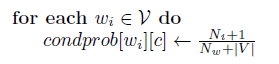 using this equation

In [ ]:
Fake_condProb_NB = {}
Real_condProb_NB = {}

for word in vocab:
  word = str(word)

  prob_f = (Fakenews_Ni[word] + 1)/(Fakenews_vocab_count + V)
  Fake_condProb_NB[word] = prob_f

  prob_r = (Realnews_Ni[word] + 1)/(Realnews_vocab_count + V)
  Real_condProb_NB[word] = prob_r


In [ ]:
print(Fake_condProb_NB['عمران'])
print(Real_condProb_NB['عمران'])

0.00023932293366403412
0.00041089698812507705


# **Boolean Naive Bayes classifer with stop words**


*  Counting words in Fake and Real news seperately **After** removing duplicates **(Nw)**



In [ ]:
#Fake news
Fakenews = ''
for news in FakeNews_list:
  Fakenews += remove_duplicate_words(news)

Fakenews_vocab_count = len(unlp(Fakenews))
Fakenews_vocab_count

17751

In [ ]:
#Real news
Realnews = ''
for news in RealNews_list:
  Realnews += remove_duplicate_words(news)

Realnews_vocab_count = len(unlp(Realnews))
Realnews_vocab_count

28328


*   Calculating number of occurances of each word in fake and real news list **After** removing duplicates from each news **(Ni)**






In [ ]:
#Real news
Fakenews_Ni = ''
for news in FakeNews_list:
  Fakenews_Ni += remove_duplicate_words(news)

Fakenews_Ni = Counter(words(Fakenews_Ni))
Fakenews_Ni

Counter({'سٹٹگارٹ': 1,
         'ا': 160,
         'ردو': 7,
         'پوائنٹ': 7,
         'اخبارتازہ': 7,
         'ترین': 23,
         '03': 1,
         'دسمبر2018': 5,
         'جرمنی': 2,
         'کی': 110,
         'موٹر': 1,
         'ساز': 2,
         'کمپنی': 23,
         'ڈیملر': 1,
         'نے': 106,
         'ئندہ': 2,
         'سال': 35,
         'سے': 107,
         'چین': 6,
         'میں': 112,
         'امرکین': 1,
         'ٹیرف': 2,
         'وجہ': 37,
         'الیکٹرک': 1,
         'کاریں': 1,
         'بند': 6,
         'کرنے': 72,
         'کا': 99,
         'اعلان': 15,
         'کیا': 80,
         'ہے': 105,
         'کے': 112,
         'حوالے': 14,
         'شعبے': 2,
         'سربراہ': 3,
         'ہوبرٹس': 1,
         'ٹروسکا': 1,
         'بتایا': 23,
         'کہ': 97,
         '2019': 4,
         'خر': 3,
         'تک': 39,
         'کاروں': 3,
         'پیداوار': 4,
         'کر': 78,
         'دے': 11,
         'گی': 34,
         'جن': 26,
         'مر

In [ ]:
#Fake news
Realnews_Ni = ''
for news in RealNews_list:
  Realnews_Ni += remove_duplicate_words(news)

Realnews_Ni = Counter(words(Realnews_Ni))
Realnews_Ni

Counter({'چین': 15,
         'کے': 149,
         'صدر': 18,
         'شی': 2,
         'جن': 42,
         'پنگ': 2,
         'نے': 150,
         'منگل': 6,
         'روز': 18,
         'کی': 150,
         'منڈی': 4,
         'کو': 137,
         'آزاد': 3,
         'بنانے': 24,
         'عمل': 17,
         'چالیس': 5,
         'سال': 57,
         'مکمل': 20,
         'ہونے': 69,
         'موقعے': 1,
         'پر': 134,
         'خطاب': 7,
         'کرتے': 57,
         'ہوئے': 72,
         'اصلاحات': 4,
         'درآمد': 3,
         'عزم': 4,
         'کا': 135,
         'اظہار': 17,
         'کیا': 114,
         'تاہم': 47,
         'انہوں': 47,
         'ان': 112,
         'خصوصی': 7,
         'اقدامات': 7,
         'ذکر': 7,
         'نہیں': 99,
         'شدت': 3,
         'سے': 144,
         'انتظار': 4,
         'جا': 39,
         'رہا': 46,
         'تھا': 84,
         'اپنی': 53,
         'طویل': 11,
         'تقریر': 3,
         'میں': 151,
         'سرکاری': 4,
         'معیشت':

**Calculating Conditional probability of each word present in Vocabulary**

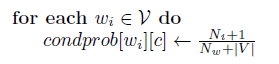 using this equation

In [ ]:
Fake_condProb_with_SW = {}
Real_condProb_with_SW = {}

for word in vocab:
  word = str(word)

  prob_f = (Fakenews_Ni[word] + 1)/(Fakenews_vocab_count + V)
  Fake_condProb_with_SW[word] = prob_f

  prob_r = (Realnews_Ni[word] + 1)/(Realnews_vocab_count + V)
  Real_condProb_with_SW[word] = prob_r


In [ ]:
print(Fake_condProb_with_SW['عمران'])
print(Real_condProb_with_SW['عمران'])

0.00018408070097930933
0.00021198229947799358


# **Boolean Naive Bayes Clasifier without stop words**

Loading Stop words to remove them from the real and fake news for training and testing

In [ ]:
with open('/content/sample_data/stopwords-ur.txt', 'r') as f:
  stop_words = f.read()

In [ ]:
stop_words

'آئی\nآئے\nآج\nآخر\nآخرکبر\nآدهی\nآًب\nآٹھ\nآیب\nاة\nاخبزت\nاختتبم\nادھر\nارد\nاردگرد\nارکبى\nاش\nاضتعوبل\nاضتعوبلات\nاضطرذ\nاضکب\nاضکی\nاضکے\nاطراف\nاغیب\nافراد\nالگ\nاور\nاوًچب\nاوًچبئی\nاوًچی\nاوًچے\nاى\nاً\nاًذر\nاًہیں\nاٹھبًب\nاپٌب\nاپٌے\nاچھب\nاچھی\nاچھے\nاکثر\nاکٹھب\nاکٹھی\nاکٹھے\nاکیلا\nاکیلی\nاکیلے\nاگرچہ\nاہن\nایطے\nایک\nب\nت\nتبزٍ\nتت\nتر\nترتیت\nتریي\nتعذاد\nتن\nتو\nتوبم\nتوہی\nتوہیں\nتٌہب\nتک\nتھب\nتھوڑا\nتھوڑی\nتھوڑے\nتھی\nتھے\nتیي\nثب\nثبئیں\nثبترتیت\nثبری\nثبرے\nثبعث\nثبلا\nثبلترتیت\nثبہر\nثدبئے\nثرآں\nثراں\nثرش\nثعذ\nثغیر\nثلٌذ\nثلٌذوثبلا\nثلکہ\nثي\nثٌب\nثٌبرہب\nثٌبرہی\nثٌبرہے\nثٌبًب\nثٌذ\nثٌذکرو\nثٌذکرًب\nثٌذی\nثڑا\nثڑوں\nثڑی\nثڑے\nثھر\nثھرا\nثھراہوا\nثھرپور\nثھی\nثہت\nثہتر\nثہتری\nثہتریي\nثیچ\nج\nخب\nخبرہب\nخبرہی\nخبرہے\nخبهوظ\nخبًب\nخبًتب\nخبًتی\nخبًتے\nخبًٌب\nخت\nختن\nخجکہ\nخص\nخططرذ\nخلذی\nخو\nخواى\nخوًہی\nخوکہ\nخٌبة\nخگہ\nخگہوں\nخگہیں\nخیطب\nخیطبکہ\nدر\nدرخبت\nدرخہ\nدرخے\nدرزقیقت\nدرضت\nدش\nدفعہ\nدلچطپ\nدلچطپی\nدلچطپیبں\nدو\nدور\nدوراى\nدوضرا\nدوضروں\nدوضری\nدوضر

## Loading Training Dataset with the removal of stop words



1.   **Fake News**



In [ ]:
FakeNews_list = []

for filename in sorted(glob.glob("/content/sample_data/FAKE/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        #remove punctuation
        word = removePunctuation(word)

        #remove stop words
        if word not in stop_words:
          news += word + ' '

      FakeNews_list.append(news)
    f.close()

In [ ]:
FakeNews_list

['سٹٹگارٹ اُردو پوائنٹ اخبارتازہ ترین 03 دسمبر2018 جرمنی موٹر ساز کمپنی ڈیملر نے آئندہ سال سے چین میں امرکین ٹیرف وجہ سے الیکٹرک کاریں بند کرنے کا اعلان کیا ڈیملر چین حوالے سے شعبے سربراہ ہوبرٹس ٹروسکا نے بتایا کمپنی آئندہ سال 2019 آخر چین میں الیکٹرک کاروں پیداوار بند جن میں مرسڈیز بینز ماڈل بھی شامل انکا مزید کہنا تھا چین میں امرکین ٹیرف وجہ سے الیکٹرک کاریں جیسا مرسڈیز بینز مے بیچ ماڈل طلب میں کمی آرہی اس لیے فیصلہ کیا گیا ',
 'کراچی آن لائن حکومت نے عوام باہرکریڈٹ یا ڈیبٹ کارڈ استعمال کرنے ٹیکس معاف دیا آپ سعودیہ عرب عمرہ یا حج سلسلے میں جارہے یا کسی کام سلسلے میں کسی ملک جا اپکو ساتھ کرنسی جانے نہیں کیونکہ بینک ڈیبٹ یا کریڈٹ کارڈ استعمال آپکو ٹیکس ادا نہیں کرنا گا ایف آر مطابق بیرون ممالک کارڈ استعمال کرنے میں فیصد ٹیکس نہیں عائد کیا جائے گا تاکہ عام عوام فائدہ سہلولیات فراہم کیجا سکیں ',
 'بیجنگ چینی حکومت نے امریکا سے تیل خریداری دوبارہ شروع رساں ادارے مطابق چین جہاز رانی کمپنی مرچنٹ مالک شیہ چون لین نے انٹرویو میں کہا چین امریکا درمیان تجارتی جنگ شدت اختیار کرجانے بعد چین ن



2.   **Real News**



In [ ]:
RealNews_list = []

for filename in sorted(glob.glob("/content/sample_data/REAL/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:

        #remove punctuation
        word = removePunctuation(word)

        #remove stop words
        if word not in stop_words:
          news += word + ' '

      RealNews_list.append(news)
    f.close()

In [ ]:
RealNews_list

['چین صدر شی جن پنگ نے منگل روز چین منڈی آزاد بنانے عمل چالیس سال مکمل ہونے موقعے خطاب اصلاحات عمل درآمد عزم کا اظہار کیا تاہم انہوں نے ان خصوصی اقدامات کا نہیں کیا جن کا شدت سے انتظار کیا جا رہا تھا صدر شی نے اپنی طویل تقریر میں سرکاری معیشت حمایت ساتھ ساتھ نجی شعبےکی نمو بھی بات انہوں نے کہا چین اپنی منڈیوں مزید آزاد کرنے کوششوں وسعت دینے کا عمل جاری گا بنیادی اصلاحات نفاذ یقینی بنائے گا بیجنگ میں قائم گریٹ ہال آف پیپل میں خطاب انہوں نے کہا ہم ثابت قدمی ساتھ سرکاری معیشت ترقی مستحکم رکھیں اس ساتھ پوری توانائی سے نجی شعبے معیشت بھی تقویت دیں چالیس سال قبل چین لیڈر آنجہانی ڈینگ ژاؤ پنگ نے اصلاحات آزاد منڈی مہم چلائی اسی وجہ سے چین نے شاندار صنعتی ترقی اب دنیا دوسری بڑی معیشت بن چکا اس موقعے خطاب صدر شی نے کہا نئے امکانات کھلنے سے ترقی جبکہ خود مقید رکھنے سے پسماندگی پیدا صدر شی نے کمیونسٹ پارٹی کردار بات کہا اصلاحات کھلے پن کا اقدام آسان نہیں مستقبل میں ہمیں قسم خطرات چیلنجوں کا سامنا گایہاں ہمیں ناقابلِ تصور ہنگامہ خیزطوفانوں کا سامنا بھی سکتا صدر شی کا خطاب ایسے وقت میں سامنے آیا اصل

**Merging Fake and Real news**

In [ ]:
AllNews_list =  FakeNews_list + RealNews_list

Counting words in combined set of Fake and Real news **After** removing duplicates **(V)**

In [ ]:
#Converting complete list of news into a single string
Allnews = ''
for news in AllNews_list:
  Allnews += news

In [ ]:
#counting words after removing duplicate words from the news string
vocab = list(unlp(remove_duplicate_words(Allnews)))
V = len(vocab)
V

9121




*   Counting words in Fake and Real news seperately **After** removing duplicates **(Nw)**



In [ ]:
Fakenews = ''
for news in FakeNews_list:
  Fakenews += remove_duplicate_words(news)

Fakenews_vocab_count = len(unlp(Fakenews))
Fakenews_vocab_count

14747

In [ ]:
Realnews = ''
for news in RealNews_list:
  Realnews += remove_duplicate_words(news)

Realnews_vocab_count = len(unlp(Realnews))
Realnews_vocab_count

23707


*   Calculating number of occurances of each word in fake and real news list **After** removing duplicates from each news **(Ni)**


In [ ]:
#Fake news
Fakenews_Ni = ''
for news in FakeNews_list:
  Fakenews_Ni += remove_duplicate_words(news)

Fakenews_Ni = Counter(words(Fakenews_Ni))
Fakenews_Ni

Counter({'سٹٹگارٹ': 1,
         'ا': 159,
         'ردو': 7,
         'پوائنٹ': 7,
         'اخبارتازہ': 7,
         'ترین': 23,
         '03': 1,
         'دسمبر2018': 5,
         'جرمنی': 2,
         'موٹر': 1,
         'ساز': 2,
         'کمپنی': 23,
         'ڈیملر': 1,
         'نے': 106,
         'ئندہ': 2,
         'سال': 35,
         'سے': 107,
         'چین': 6,
         'میں': 112,
         'امرکین': 1,
         'ٹیرف': 2,
         'وجہ': 37,
         'الیکٹرک': 1,
         'کاریں': 1,
         'بند': 6,
         'کرنے': 72,
         'کا': 98,
         'اعلان': 15,
         'کیا': 80,
         'حوالے': 14,
         'شعبے': 2,
         'سربراہ': 3,
         'ہوبرٹس': 1,
         'ٹروسکا': 1,
         'بتایا': 23,
         '2019': 4,
         'خر': 3,
         'کاروں': 3,
         'پیداوار': 4,
         'جن': 26,
         'مرسڈیز': 1,
         'بینز': 1,
         'ماڈل': 6,
         'بھی': 89,
         'شامل': 17,
         'انکا': 6,
         'مزید': 20,
         'کہنا': 44,
  

In [ ]:
#Feal news
Realnews_Ni = ''
for news in RealNews_list:
  Realnews_Ni += remove_duplicate_words(news)

Realnews_Ni = Counter(words(Realnews_Ni))
Realnews_Ni

Counter({'چین': 15,
         'صدر': 18,
         'شی': 2,
         'جن': 42,
         'پنگ': 2,
         'نے': 150,
         'منگل': 6,
         'روز': 18,
         'منڈی': 4,
         'آزاد': 3,
         'بنانے': 24,
         'عمل': 17,
         'چالیس': 5,
         'سال': 57,
         'مکمل': 20,
         'ہونے': 69,
         'موقعے': 1,
         'خطاب': 7,
         'اصلاحات': 4,
         'درآمد': 3,
         'عزم': 4,
         'کا': 135,
         'اظہار': 17,
         'کیا': 114,
         'تاہم': 47,
         'انہوں': 47,
         'ان': 112,
         'خصوصی': 7,
         'اقدامات': 7,
         'نہیں': 99,
         'شدت': 3,
         'سے': 144,
         'انتظار': 4,
         'جا': 39,
         'رہا': 46,
         'تھا': 84,
         'اپنی': 53,
         'طویل': 11,
         'تقریر': 3,
         'میں': 151,
         'سرکاری': 4,
         'معیشت': 6,
         'حمایت': 4,
         'ساتھ': 65,
         'نجی': 7,
         'شعبےکی': 1,
         'نمو': 4,
         'بھی': 121,
         'بات'

**Calculating Conditional probability of each word present in Vocabulary**

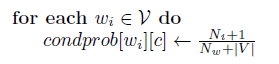 using this equation

In [ ]:
Fake_condProb_without_SW = {}
Real_condProb_without_SW = {}

for word in vocab:
  word = str(word)

  prob_fake = (Fakenews_Ni[word] + 1)/(Fakenews_vocab_count + V)
  Fake_condProb_without_SW[word] = prob_fake

  prob_real = (Realnews_Ni[word] + 1)/(Realnews_vocab_count + V)
  Real_condProb_without_SW[word] = prob_real


In [ ]:
print(Fake_condProb_without_SW['عمران'])
print(Real_condProb_without_SW['عمران'])

0.00020948550360315067
0.00024369440721335446


# **Testing**

**Label assigned to each news**

NB = Naive Bayes

BNB = Binary Naive Bayes

SW = Stop words


In [ ]:
y_true_NB = []
y_true_BNB_without_SW = []
y_true_BNB_with_SW = []

**Loading Test set for Naive bayes Clasifier**

In [ ]:
#Fake news

News = []
for filename in sorted(glob.glob("/content/sample_data/TEST FAKE/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '

      News.append(news)
      y_true_NB.append('fake')

    f.close()

#Real news
for filename in sorted(glob.glob("/content/sample_data/TEST REAL/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '

      News.append(news)
      y_true_NB.append('real')

    f.close()

**Loading Test set for Binary Naive bayes Clasifier with Stop words**

In [ ]:
#Fake news

News = []
for filename in sorted(glob.glob("/content/sample_data/TEST FAKE/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '

      news = remove_duplicate_words(news)
      News.append(news)
      y_true_BNB_with_SW.append('fake')

    f.close()

#Real news
for filename in sorted(glob.glob("/content/sample_data/TEST REAL/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        news += word + ' '

      news = remove_duplicate_words(news)
      News.append(news)
      y_true_BNB_with_SW.append('real')

    f.close()

**Loading Test set for Binary Naive bayes Clasifier without Stop words**

In [ ]:
#Fake news

News = []
for filename in sorted(glob.glob("/content/sample_data/TEST FAKE/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        if word not in stop_words:
          news += word + ' '

      news = remove_duplicate_words(news)
      News.append(news)
      y_true_BNB_without_SW.append('fake')

    f.close()

#Real news
for filename in sorted(glob.glob("/content/sample_data/TEST REAL/*.txt")):
    with open(filename, 'r') as f:
      i = f.read()

      sentence = unlp(i)
      news =  ''
      for word in sentence:
        word = removePunctuation(word)
        if word not in stop_words:
          news += word + ' '

      news = remove_duplicate_words(news)
      News.append(news)
      y_true_BNB_without_SW.append('real')

    f.close()

**These functions will calculate the probabilty of each word in test news and return real or fake using argmax**



1.   **predict_NB** = Prediction of Real and Fake news with Naive Bayes Classifier
2.   **predict_BNB_without_SW** = Prediction of Real and Fake news with Binary Naive Bayes Classifier without Stopwords
3. **predict_BNB_with_SW** = Prediction of Real and Fake news with Binary Naive Bayes Classifier with Stopwords










In [ ]:
#Naive Bayes
def predict_NB(news):

  C = ['real','fake']
  score = {}

  for c in C:
    score[c] = math.log(prior[c])

    for word in news:
      if c == 'real':
        if word in Real_condProb_NB:
          score[c] += math.log(Real_condProb_NB[word])

      elif c == 'fake':
        if word in Fake_condProb_NB:
          score[c] += math.log(Fake_condProb_NB[word])

  result = max(score, key = score.get)
  y_pred_NB.append(result)

  if result == 'real':
    r['real'] += 1
  elif result == 'fake':
    r['fake'] += 1


In [ ]:
#Binary Naive Bayes without stopwords
def predict_BNB_without_SW(news):

  C = ['real','fake']
  score = {}

  for c in C:
    score[c] = math.log(prior[c])

    for word in news:
      if c == 'real':
        if word in Real_condProb_NB:
          score[c] += math.log(Real_condProb_without_SW[word])

      elif c == 'fake':
        if word in Fake_condProb_NB:
          score[c] += math.log(Fake_condProb_without_SW[word])

  result = max(score, key = score.get)
  y_pred_BNB_without_SW.append(result)

  if result == 'real':
    r['real'] += 1
  elif result == 'fake':
    r['fake'] += 1

In [ ]:
#Binary Naive bayes with stop words
def predict_BNB_with_SW(news):

  C = ['real','fake']
  score = {}

  for c in C:
    score[c] = math.log(prior[c])

    for word in news:
      if c == 'real':
        if word in Real_condProb_NB:
          score[c] += math.log(Real_condProb_with_SW[word])

      elif c == 'fake':
        if word in Fake_condProb_NB:
          score[c] += math.log(Fake_condProb_with_SW[word])

  result = max(score, key = score.get)
  y_pred_BNB_with_SW.append(result)

  if result == 'real':
    r['real'] += 1
  elif result == 'fake':
    r['fake'] += 1

## **Testing the final working of the Model**


1.   **Naive Bayes**



In [ ]:
y_pred_NB = []

r = {'real':0, 'fake':0}

for news in News:
  sentence = unlp(news)
  news = []
  for word in sentence:
    word = removePunctuation(word)
    news.append(word)

  predict_NB(news)

r

{'real': 53, 'fake': 2}


2.   **Binary Naive Bayes without Stopwords**



In [ ]:
y_pred_BNB_without_SW = []

r = {'real':0, 'fake':0}

for news in News:
  sentence = unlp(news)
  news = []
  for word in sentence:
    word = removePunctuation(word)
    news.append(word)

  predict_BNB_without_SW(news)

r

{'real': 54, 'fake': 1}




3.   **Binary Naive Bayes with Stopwords**



In [ ]:
y_pred_BNB_with_SW = []

r = {'real':0, 'fake':0}

for news in News:
  sentence = unlp(news)
  news = []
  for word in sentence:
    word = removePunctuation(word)
    news.append(word)

  predict_BNB_with_SW(news)

r

{'real': 54, 'fake': 1}

# **Classification Report**

In [ ]:
target_names = ['real', 'fake']

1. Classification report for **Naive Bayes**

In [ ]:
print(classification_report(y_true_NB, y_pred_NB, target_names=target_names))

              precision    recall  f1-score   support

        real       1.00      0.07      0.14        27
        fake       0.53      1.00      0.69        28

    accuracy                           0.55        55
   macro avg       0.76      0.54      0.41        55
weighted avg       0.76      0.55      0.42        55



1. Classification report for **Binary Naive Bayes without Stopwords**

In [ ]:
print(classification_report(y_true_BNB_without_SW, y_pred_BNB_without_SW, target_names=target_names))

              precision    recall  f1-score   support

        real       1.00      0.04      0.07        27
        fake       0.52      1.00      0.68        28

    accuracy                           0.53        55
   macro avg       0.76      0.52      0.38        55
weighted avg       0.75      0.53      0.38        55



1. Classification report for **Binary Naive Bayes with Stopwords**

In [ ]:
print(classification_report(y_true_BNB_with_SW, y_pred_BNB_with_SW, target_names=target_names))

              precision    recall  f1-score   support

        real       1.00      0.04      0.07        27
        fake       0.52      1.00      0.68        28

    accuracy                           0.53        55
   macro avg       0.76      0.52      0.38        55
weighted avg       0.75      0.53      0.38        55



**Results**

We can clearly see that Boolean Naive Bayes improves our performance as compared to simple Naive Bayes Classifier



1.   Naive Bayes = 75%
2.   Binary Naive Bayes with stopwords = 76%
3. Binary Naive Bayes without stopwords = 77%

